# Project 3 Yuchen Feng

# II. Qualitative Dependent Variable Models

In [1]:
# age (numeric)
# job : type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
# marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# default: has credit in default? (categorical: 'no','yes','unknown')
# balance: average yearly balance, in euros (numeric)
# housing: has housing loan? (categorical: 'no','yes','unknown')
# loan: has personal loan? (categorical: 'no','yes','unknown')
# contact: contact communication type (categorical:'cellular','telephone')
# day: last contact day of the month (numeric 1 -31)
# month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
# duration: last contact duration, in seconds (numeric).
# Important note: this attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic
# predictive model.
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# previous: number of contacts performed before this campaign and for this client (numeric)
# poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')
# target: has the client subscribed a term deposit? (binary:"yes","no")

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
bank = pd.read_csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/bank.csv',index_col=False)
bank.head()

,col,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1.0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2.0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3.0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4.0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5.0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank1=bank[['Target','age','job','marital','education','default','balance','housing','loan']]

In [5]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Target     45211 non-null  object
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


Since there are many columns reveal the full story that whether or not has the client subscribed a term deposit, some of the variables economically telling the same story. If we put these variables into the study, the correlation bewteen independent variables will be high enough causing the multicollinearity. Thus, we manually decided the variables that we focus on and run the test. 

## 1. Data Preprocessing

### Assign the dependent variable 'Target' as a dummy variable

In [6]:
num={'no':0,'yes':1}
bank1['Target']=bank['Target'].replace(num)
bank1.head()

/var/folders/mx/8zlzbwcd4lndtb3lb2bwxdkm0000gn/T/ipykernel_72959/4001220698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1['Target']=bank['Target'].replace(num)


,Target,age,job,marital,education,default,balance,housing,loan
0,0,58,management,married,tertiary,no,2143,yes,no
1,0,44,technician,single,secondary,no,29,yes,no
2,0,33,entrepreneur,married,secondary,no,2,yes,yes
3,0,47,blue-collar,married,unknown,no,1506,yes,no
4,0,33,unknown,single,unknown,no,1,no,no


### Convert categorical type data into numeric type

In [7]:
bank_num=bank1.select_dtypes(['int64','float64'])
bank_cat=bank1.select_dtypes(object)

In [8]:
bank_num.head()

,Target,age,balance
0,0,58,2143
1,0,44,29
2,0,33,2
3,0,47,1506
4,0,33,1


In [9]:
bank_cat.head()

,job,marital,education,default,housing,loan
0,management,married,tertiary,no,yes,no
1,technician,single,secondary,no,yes,no
2,entrepreneur,married,secondary,no,yes,yes
3,blue-collar,married,unknown,no,yes,no
4,unknown,single,unknown,no,no,no


In [10]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

for col in bank_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    bank_cat[col]=le.fit_transform(bank_cat[col])


# After applying LabelEncoder we concatenate bank_cat and bank_num.
bank_new=pd.concat([bank_num,bank_cat],axis=1)

bank_new.head()

,Target,age,balance,job,marital,education,default,housing,loan
0,0,58,2143,4,1,2,0,1,0
1,0,44,29,9,2,1,0,1,0
2,0,33,2,2,1,1,0,1,1
3,0,47,1506,1,1,3,0,1,0
4,0,33,1,11,2,3,0,0,0


In [11]:
bank_new['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [12]:
bank_new.describe()

,Target,age,balance,job,marital,education,default,housing,loan
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.116985,40.936210,1362.272058,4.339762,1.167725,1.224813,0.018027,0.555838,0.160226
std,0.321406,10.618762,3044.765829,3.272657,0.608230,0.747997,0.133049,0.496878,0.366820
min,0.000000,18.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,72.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,39.000000,448.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,48.000000,1428.000000,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,95.000000,102127.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000


In [13]:
#save data after basic data cleaning
from pathlib import Path  
filepath = Path('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/bank_processed.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
bank_new.to_csv(filepath) 

### Model Variable Selection

In [14]:
#library to use R in Python 
import rpy2

import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [15]:
%%R
#install.packages("Boruta")
bankf<-read.csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/bank_processed.csv')
keeps <- c("Target", "age","balance","job","marital","education","default","housing",'loan')
bankf=bankf[keeps]
library(Boruta)
boruta.reg <- Boruta( Target~., data = bankf, doTrace = 2)

R[write to console]:  1. run of importance source...

R[write to console]:  2. run of importance source...

R[write to console]:  3. run of importance source...

R[write to console]:  4. run of importance source...

R[write to console]:  5. run of importance source...

R[write to console]:  6. run of importance source...

R[write to console]:  7. run of importance source...

R[write to console]:  8. run of importance source...

R[write to console]:  9. run of importance source...

R[write to console]:  10. run of importance source...

R[write to console]: After 10 iterations, +1.7 mins: 

R[write to console]:  confirmed 7 attributes: age, balance, education, housing, job and 2 more;

R[write to console]:  still have 1 attribute left.


R[write to console]:  11. run of importance source...

R[write to console]:  12. run of importance source...

R[write to console]:  13. run of importance source...

R[write to console]:  14. run of importance source...

R[write to console]:  15. run of i

Boruta performed 21 iterations in 3.635173 mins.
 8 attributes confirmed important: age, balance, default, education,
housing and 3 more;
 No attributes deemed unimportant.


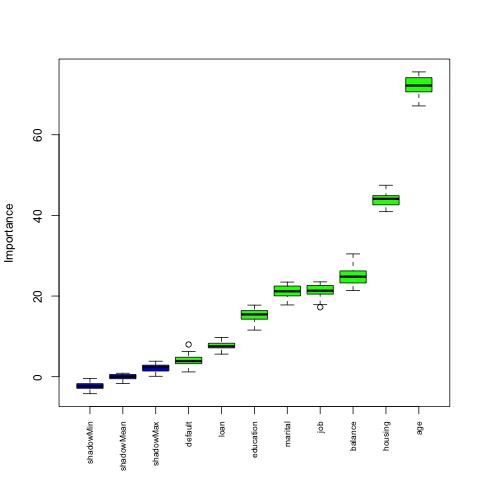

In [16]:
%%R

boruta.reg_result <- TentativeRoughFix(boruta.reg)
print(boruta.reg_result)

plot(boruta.reg_result, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta.reg_result$ImpHistory),function(i)
  boruta.reg_result$ImpHistory[is.finite(boruta.reg_result$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.reg_result$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
     at = 1:ncol(boruta.reg_result$ImpHistory), cex.axis = 0.7)

## 2. Descriptive Analysis

In [34]:
bank_new.describe()

,Target,age,balance,job,marital,education,default,housing,loan
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.116985,40.936210,1362.272058,4.339762,1.167725,1.224813,0.018027,0.555838,0.160226
std,0.321406,10.618762,3044.765829,3.272657,0.608230,0.747997,0.133049,0.496878,0.366820
min,0.000000,18.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,72.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,39.000000,448.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,48.000000,1428.000000,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,95.000000,102127.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000


In [36]:
bank_new.skew()

Target       2.383480
age          0.684818
balance      8.360308
job          0.261755
marital     -0.102826
education    0.197275
default      7.245375
housing     -0.224766
loan         1.852617
dtype: float64

### Histograms

In [ ]:
import matplotlib.pyplot as plt

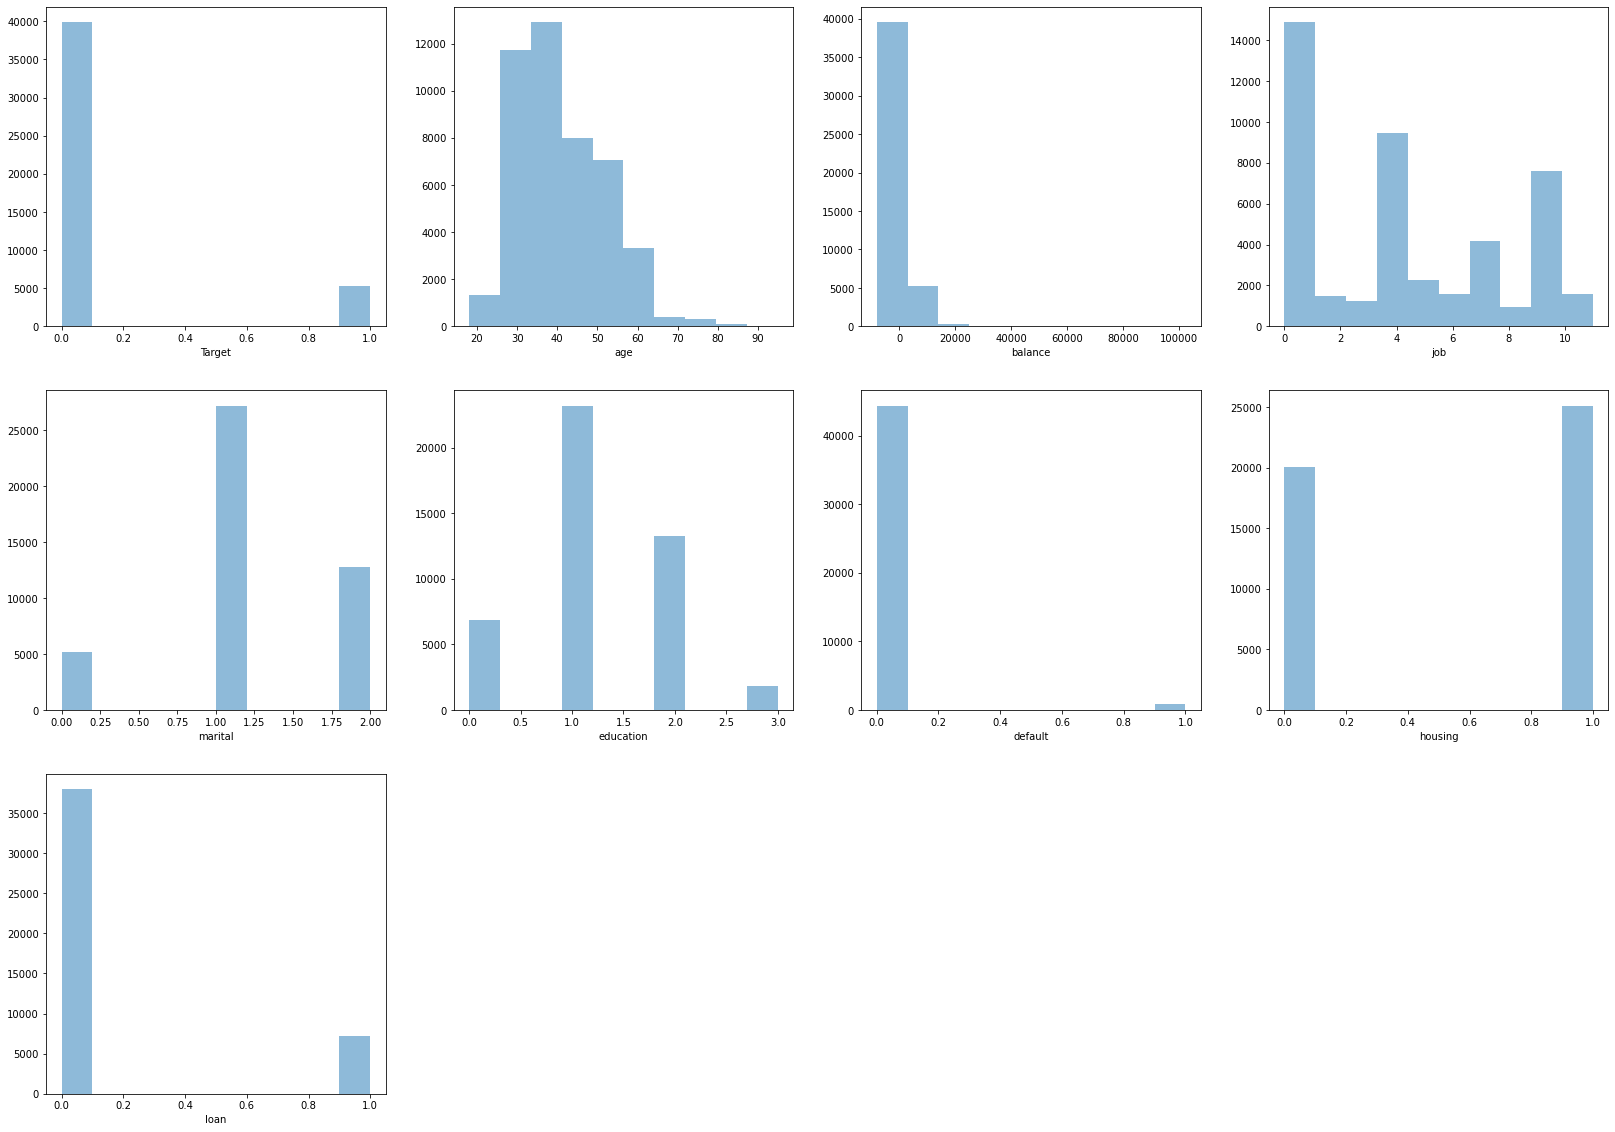

In [37]:
#'Target','age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan'

plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = bank_new.Target
res = plt.hist(x1,alpha = .5)
label=plt.xlabel("Target")

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = bank_new.age
res = plt.hist(x2,alpha = .5)
label=plt.xlabel("age")

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = bank_new.balance
res = plt.hist(x3,alpha = .5)
label=plt.xlabel("balance")

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = bank_new.job
res = plt.hist(x4,alpha = .5)
label=plt.xlabel("job")

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = bank_new.marital
res = plt.hist(x5,alpha = .5)
label=plt.xlabel("marital")

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = bank_new.education
res = plt.hist(x6,alpha = .5)
label=plt.xlabel("education")

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = bank_new.default
res = plt.hist(x7,alpha = .5)
label=plt.xlabel("default")

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = bank_new.housing
res = plt.hist(x8,alpha = .5)
label=plt.xlabel("housing")

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = bank_new.loan
res = plt.hist(x9,alpha = .5)
label=plt.xlabel("loan")


plt.show()

From the histograms, we can tell that the independent variables 'age' and 'education' are kind of normally distribubted, and 'balance' and 'job' show potential bias. 'marital', 'default', 'housing' and 'loan' dummy variables.

### QQ Plot

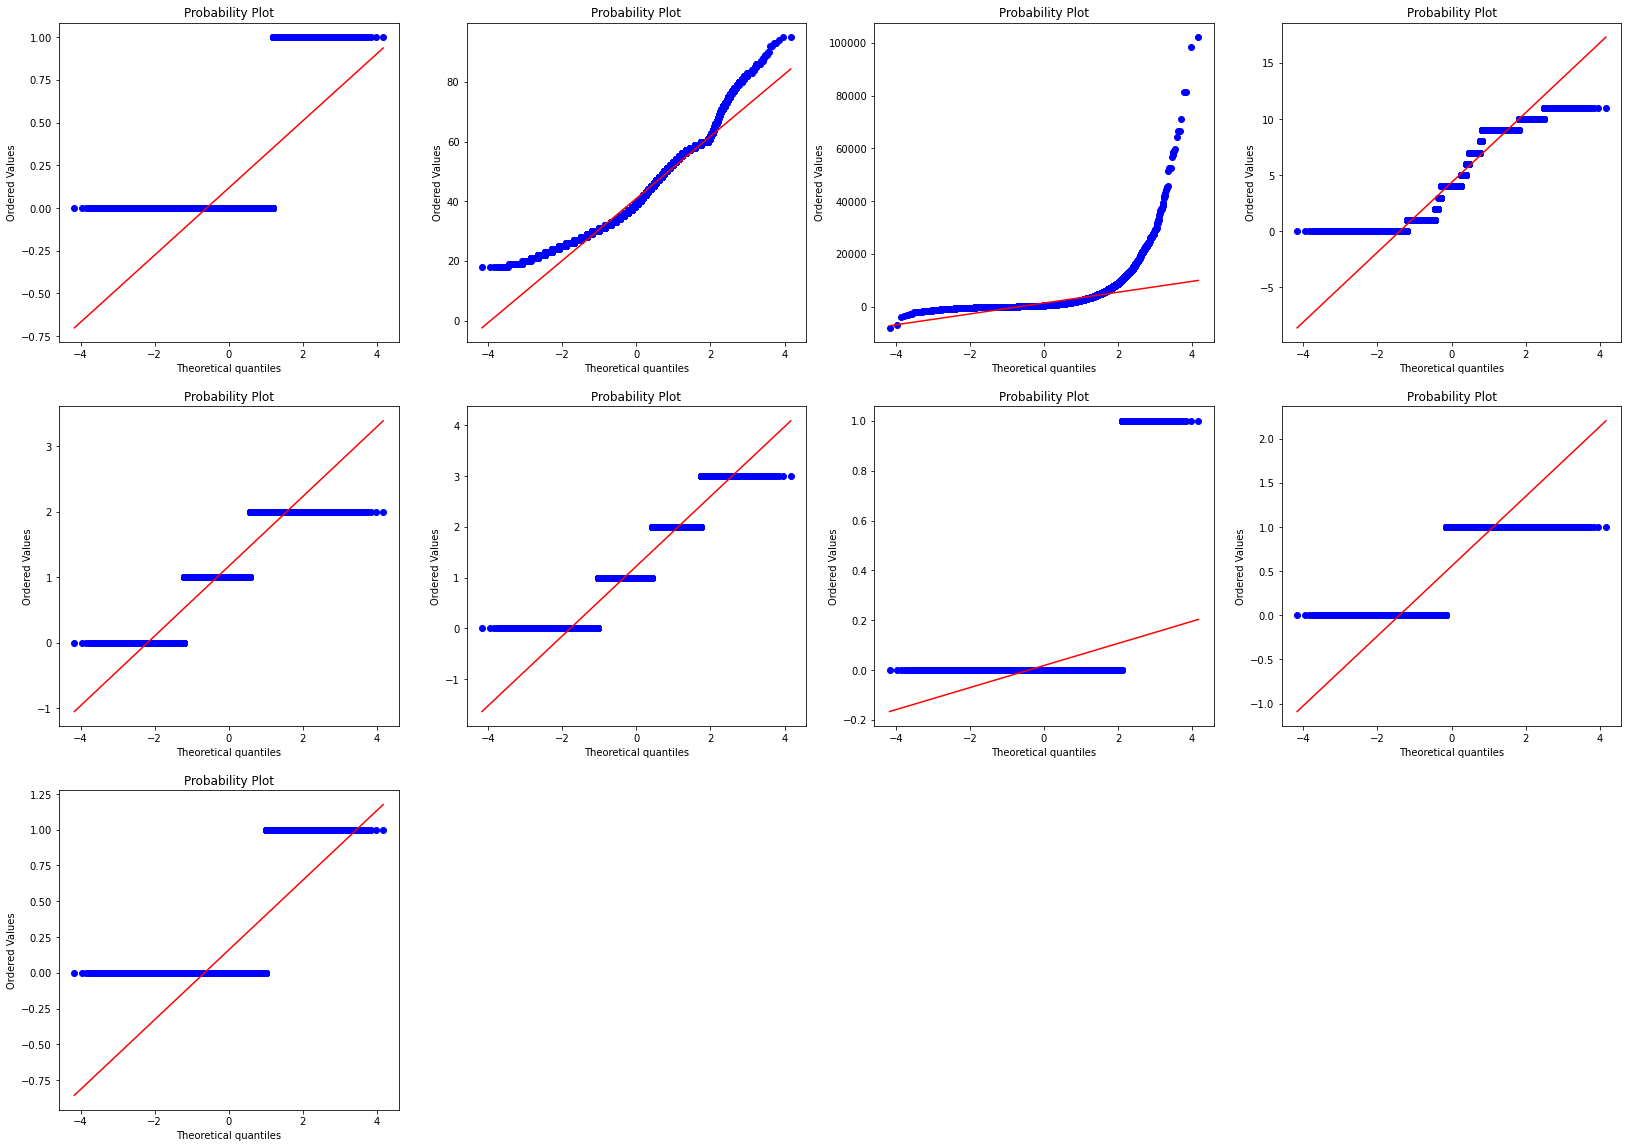

In [38]:
#'Target','age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan'

plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = bank_new.Target
res = stats.probplot(x1,dist="norm", plot=plt)

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = bank_new.age
res = stats.probplot(x2,dist="norm", plot=plt)

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = bank_new.balance
res = stats.probplot(x3,dist="norm", plot=plt)

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = bank_new.job
res = stats.probplot(x4,dist="norm", plot=plt)

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = bank_new.marital
res = stats.probplot(x5,dist="norm", plot=plt)

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = bank_new.education
res = stats.probplot(x6,dist="norm", plot=plt)

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = bank_new.default
res = stats.probplot(x7,dist="norm", plot=plt)

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = bank_new.housing
res = stats.probplot(x8,dist="norm", plot=plt)

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = bank_new.loan
res = stats.probplot(x9,dist="norm", plot=plt)

plt.show()

From QQ plots, we can see that only 'age' are close to the normal line and the left part of 'balance' are identical to it as well. 'job' is nearly around the normal line. Other variables are dummy variables which cross the lines by stages.

### Correlation Plot

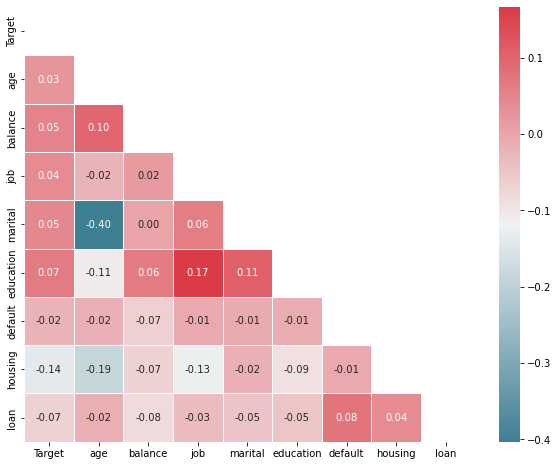

In [39]:
sub_data =  bank_new[['Target','age', 'balance', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
corr = sub_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

From the correlation chart, we can see that 'marital' and 'age' is the most highly correlated group which stands for -0.40. 'education' and 'job' are the Second highly correlated group which stands for 0.17, but it can be ignored neither. The other variables are nearly not related acording to the chart.

### Boxplots

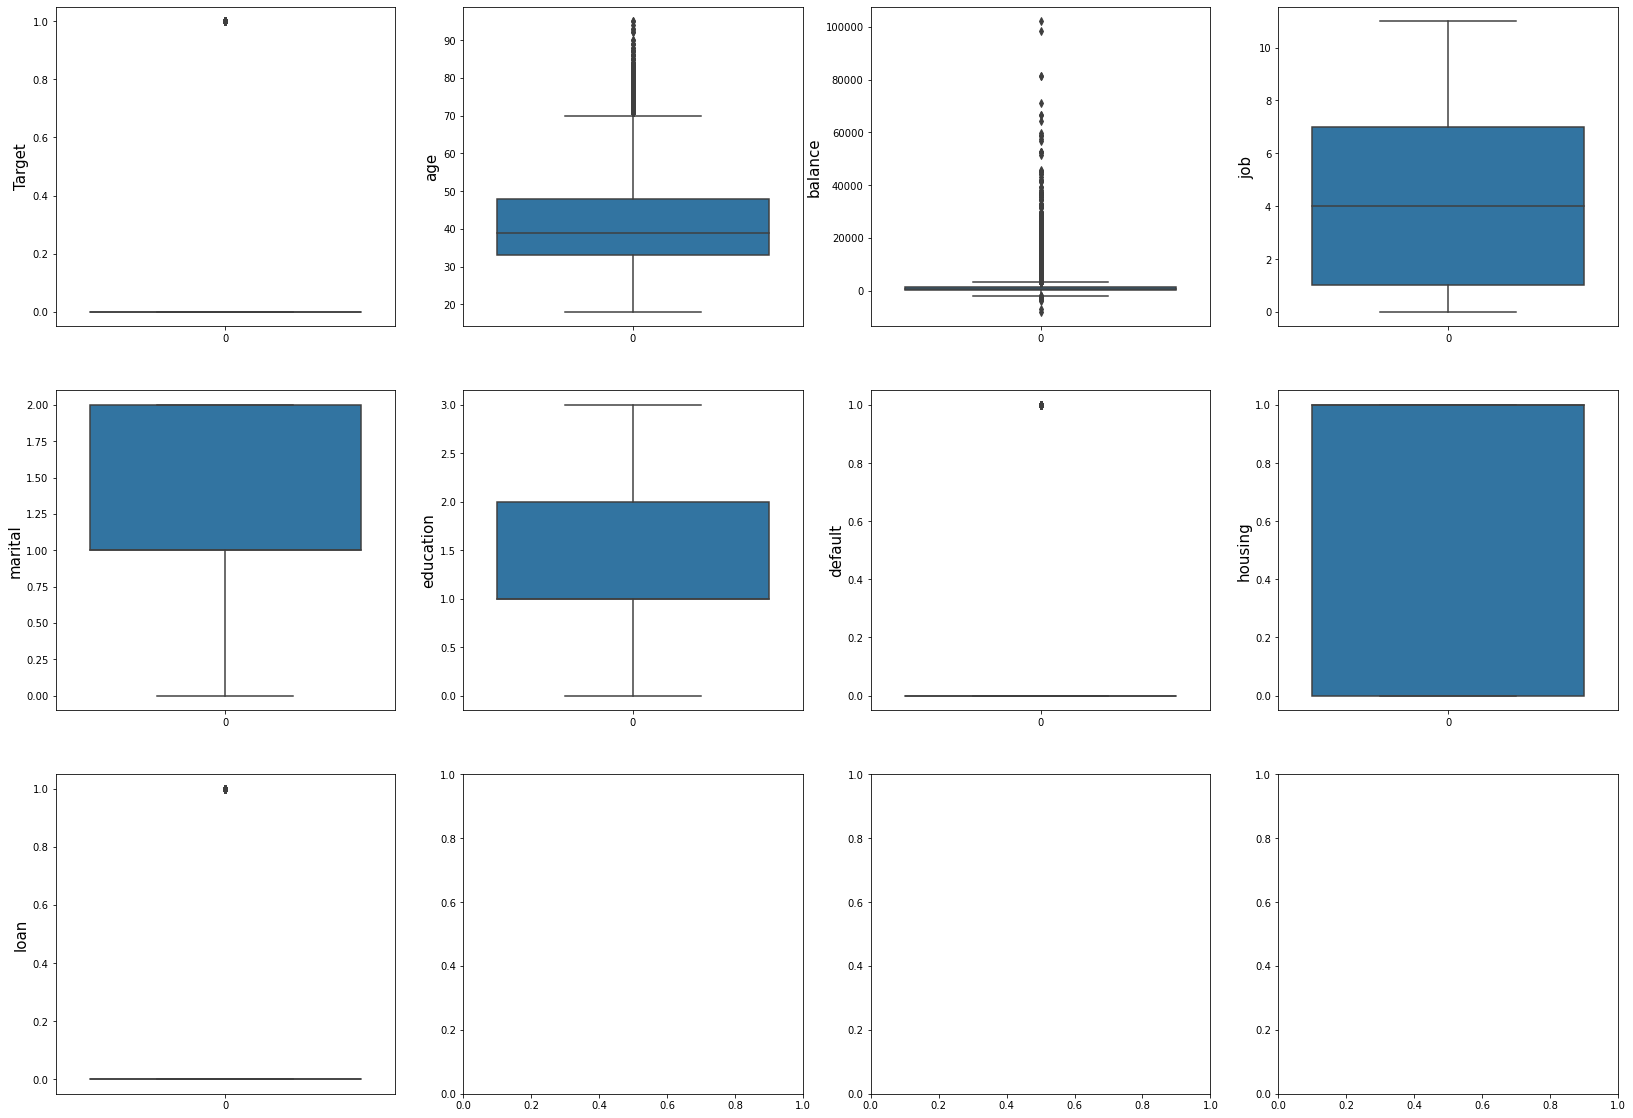

In [42]:
fig, axes = plt.subplots(3, 4, figsize=(28, 20))

sns.boxplot(ax=axes[0,0], data = bank_new.Target)
axes[0,0].set_ylabel('Target',fontsize=15)

sns.boxplot(ax=axes[0,1], data = bank_new.age)
axes[0,1].set_ylabel('age',fontsize=15)

sns.boxplot(ax=axes[0,2], data = bank_new.balance)
axes[0,2].set_ylabel('balance',fontsize=15)

sns.boxplot(ax=axes[0,3], data = bank_new.job)
axes[0,3].set_ylabel('job',fontsize=15)

sns.boxplot(ax=axes[1,0], data = bank_new.marital)
axes[1,0].set_ylabel('marital',fontsize=15)

sns.boxplot(ax=axes[1,1], data = bank_new.education)
axes[1,1].set_ylabel('education',fontsize=15)

sns.boxplot(ax=axes[1,2], data = bank_new.default)
axes[1,2].set_ylabel('default',fontsize=15)

sns.boxplot(ax=axes[1,3], data = bank_new.housing)
axes[1,3].set_ylabel('housing',fontsize=15)

sns.boxplot(ax=axes[2,0], data = bank_new.loan)
axes[2,0].set_ylabel('loan',fontsize=15)

plt.show()

### Scatter Plot

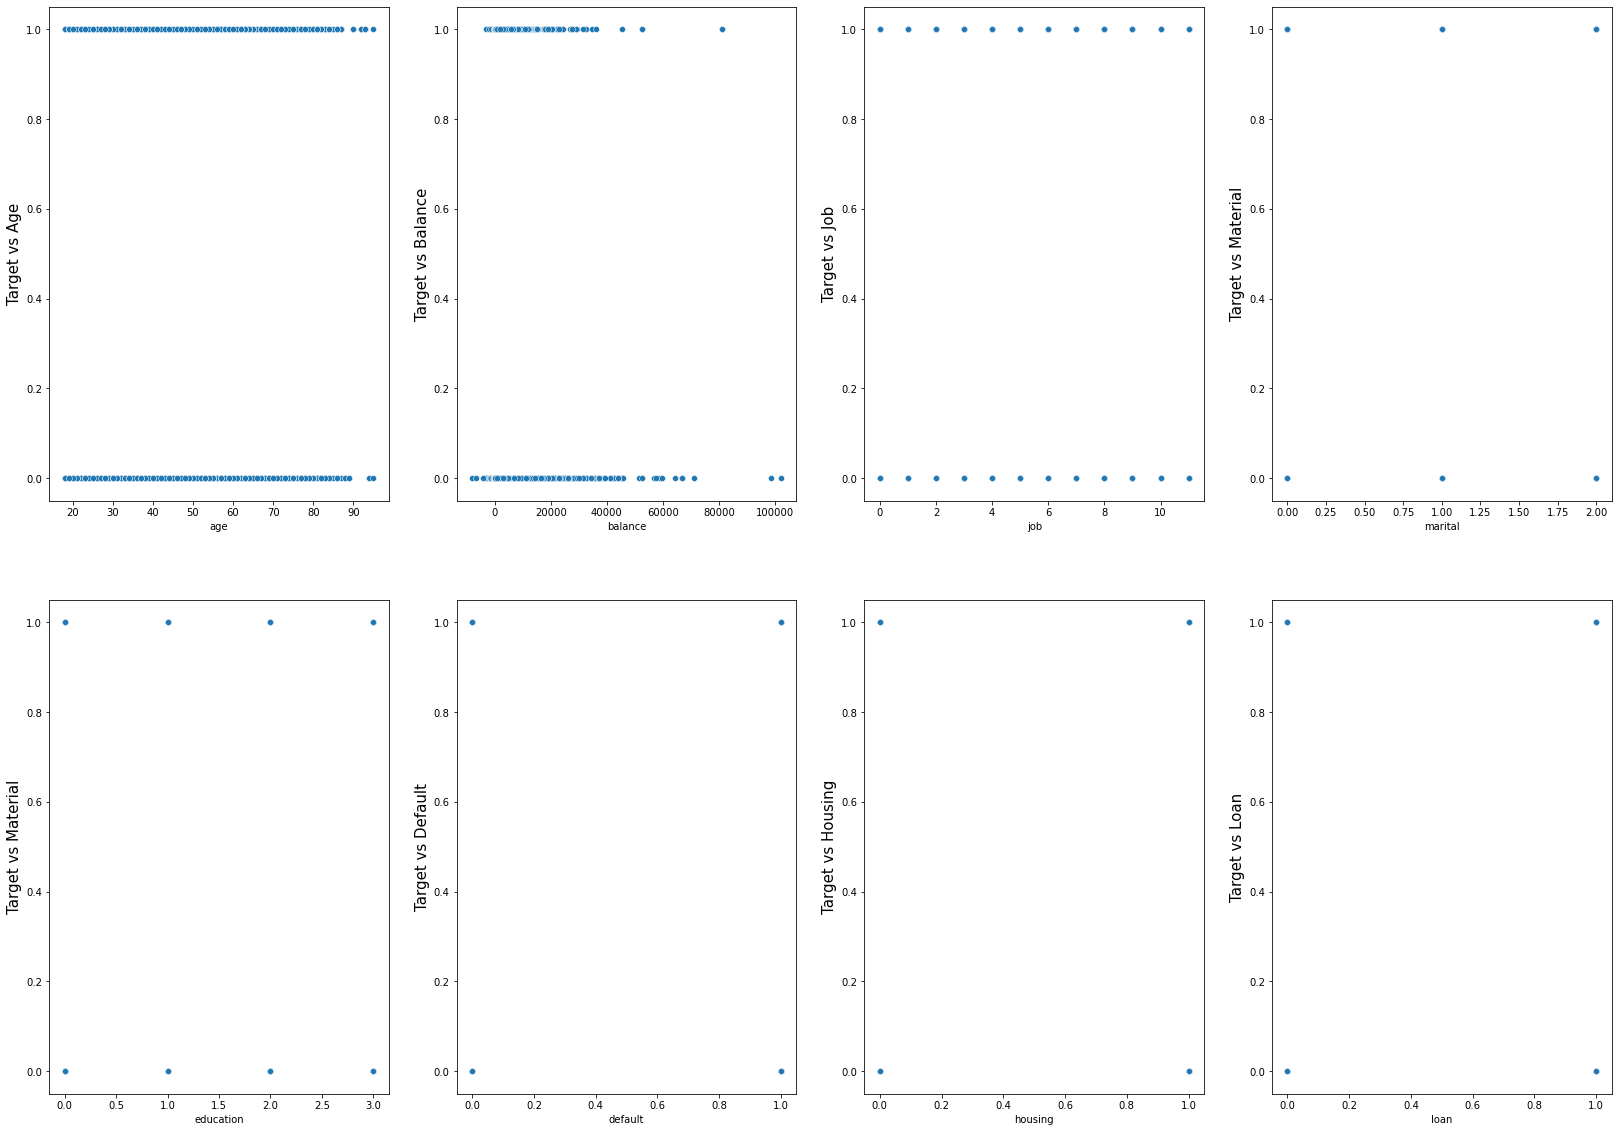

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(28, 20))

sns.scatterplot(ax=axes[0,0], data = bank_new, y = "Target", x = "age")
axes[0,0].set_ylabel('Target vs Age',fontsize=15)

sns.scatterplot(ax=axes[0,1], data = bank_new, y = "Target", x = "balance")
axes[0,1].set_ylabel('Target vs Balance',fontsize=15)

sns.scatterplot(ax=axes[0,2], data = bank_new, y = "Target", x = "job")
axes[0,2].set_ylabel('Target vs Job',fontsize=15)

sns.scatterplot(ax=axes[0,3], data = bank_new, y = "Target", x = "marital")
axes[0,3].set_ylabel('Target vs Material',fontsize=15)

sns.scatterplot(ax=axes[1,0],data = bank_new, y = "Target", x = "education")
axes[1,0].set_ylabel('Target vs Material',fontsize=15)

sns.scatterplot(ax=axes[1,1], data = bank_new, y = "Target", x = "default")
axes[1,1].set_ylabel('Target vs Default',fontsize=15)

sns.scatterplot(ax=axes[1,2], data = bank_new, y = "Target", x = "housing")
axes[1,2].set_ylabel('Target vs Housing',fontsize=15)

sns.scatterplot(ax=axes[1,3], data = bank_new, y = "Target", x = "loan")
axes[1,3].set_ylabel('Target vs Loan',fontsize=15)


plt.show()

The scatterplot of Target vs loan shows that the loan which influnce Target are nearly evenly distributed from 0.0 to 1.0.

## 3. Which model is preferred?

Before we start to split dataset and fit the model, we need to spend some time explaining the dependent variable. Based on common sense, it is hard to convince people buy things via teleselling. People are used to suspect the reliability of the selling firm, the product, and the seller who make the phone call. Under this circumstance, we try to change our threshold of probability to 0.2 (a figure larger than the mean of dependent variable Target). If the predict result is large than 0.2, we regard this people as a bank's target client who will subscribe the term deposit.

### Split dataset into two groups: train and predict

In [17]:
bank_new_train=bank_new.iloc[4:45211]
bank_new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 4 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Target     45207 non-null  int64
 1   age        45207 non-null  int64
 2   balance    45207 non-null  int64
 3   job        45207 non-null  int64
 4   marital    45207 non-null  int64
 5   education  45207 non-null  int64
 6   default    45207 non-null  int64
 7   housing    45207 non-null  int64
 8   loan       45207 non-null  int64
dtypes: int64(9)
memory usage: 3.1 MB


In [18]:
bank_new_predict=bank_new.iloc[0:4]
bank_new_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Target     4 non-null      int64
 1   age        4 non-null      int64
 2   balance    4 non-null      int64
 3   job        4 non-null      int64
 4   marital    4 non-null      int64
 5   education  4 non-null      int64
 6   default    4 non-null      int64
 7   housing    4 non-null      int64
 8   loan       4 non-null      int64
dtypes: int64(9)
memory usage: 416.0 bytes


## Fit the three models

### 1) Linear Probability Model

In [19]:
reg_lin = smf.ols(formula='Target ~ age+balance+job+marital+education+default+housing+loan',
                  data=bank_new_train)
results_lin = reg_lin.fit(cov_type='HC3')

# Print regression table:
table = pd.DataFrame({'b': round(results_lin.params, 4),
                      'se': round(results_lin.bse, 4),
                      't': round(results_lin.tvalues, 4),
                      'pval': round(results_lin.pvalues, 4)})
print(f'table: \n{table}\n')

table: 
                b      se        t    pval
Intercept  0.0842  0.0104   8.1122  0.0000
age        0.0006  0.0002   3.2793  0.0010
balance    0.0000  0.0000   5.9839  0.0000
job        0.0012  0.0005   2.6878  0.0072
marital    0.0229  0.0028   8.3160  0.0000
education  0.0195  0.0021   9.5030  0.0000
default   -0.0375  0.0089  -4.2188  0.0000
housing   -0.0806  0.0032 -25.3777  0.0000
loan      -0.0474  0.0034 -13.9181  0.0000



### 2) Probit Model

In [20]:
# Estimate a probit model:
reg_probit = smf.probit(formula='Target ~ age+balance+job+marital+education+default+housing+loan',
                        data=bank_new_train)
results_probit = reg_probit.fit(disp=0)
print(f'results_probit.summary(): \n{results_probit.summary()}\n')

# log likelihood value:
print(f'results_probit.llf: {results_probit.llf}\n')

# McFadden's pseudo R2:
print(f'results_probit.prsquared: {results_probit.prsquared}\n')

results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45207
Model:                         Probit   Df Residuals:                    45198
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                 0.04036
Time:                        19:19:37   Log-Likelihood:                -15657.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                5.170e-279
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3950      0.050    -27.934      0.000      -1.493      -1.297
age            0.0031      0.001      3.955      0.000       0.002       0.005
balance     1.441e-05   2

### 3) Logit Model

In [21]:
# Estimate a logit model:
reg_logit = smf.logit(formula='Target ~ age+balance+job+marital+education+default+housing+loan',
                      data=bank_new_train)

# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')

# log likelihood value:
print(f'results_logit.llf: {results_logit.llf}\n')

# McFadden's pseudo R2:
print(f'results_logit.prsquared: {results_logit.prsquared}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45207
Model:                          Logit   Df Residuals:                    45198
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                 0.04080
Time:                        19:19:37   Log-Likelihood:                -15649.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                3.765e-282
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4453      0.095    -25.651      0.000      -2.632      -2.258
age            0.0064      0.002      4.269      0.000       0.003       0.009
balance     2.391e-05   3.

## Prediction

In [22]:
predictions = results_lin.predict(bank_new_predict)

print(f'lin predictions: \n{predictions}\n')

predictions = results_probit.predict(bank_new_predict)

print(f'probit predictions: \n{predictions}\n')

predictions = results_logit.predict(bank_new_predict)

print(f'logit predictions: \n{predictions}\n')

lin predictions: 
0    0.113551
1    0.107047
2    0.021334
3    0.120367
dtype: float64

probit predictions: 
0    0.105522
1    0.101348
2    0.039357
3    0.112293
dtype: float64

logit predictions: 
0    0.103796
1    0.101555
2    0.040551
3    0.109399
dtype: float64



### Confusion Matrix

In [23]:
%%R
# Mode 1: OLS Model
ols.mod = lm(Target ~ age+balance+job+marital+education+default+housing+loan,data=bankf)
#summary(ols.mod)

ols.pred.classes <- ifelse(fitted(ols.mod) > 0.2, 1, 0)
table(ols.pred.classes, bankf$Target)

      [,1] [,2]
[1,] 38007 4710
[2,]  1915  579


In [24]:
P=38007/(38007+4710)
R=38007/(38007+1915)
F1=2*P*R/(P+R)

print(f'Lin F1 Score: \n{F1}\n')

Lin F1 Score: 
0.9198320405619623



In [25]:
%%R
# Model 2: Probit
probit.mod = glm(Target ~ age+balance+job+marital+education+default+housing+loan, family=binomial(link="probit"),
data=bankf)
probit.pred.classes <- ifelse(fitted(probit.mod) > 0.2, 1, 0)
table(probit.pred.classes, bankf$Target)

      [,1] [,2]
[1,] 36870 4368
[2,]  3052  921


In [26]:
P=36870/(36870+4368)
R=36870/(36870+3052)
F1=2*P*R/(P+R)

print(f'Probit F1 Score: \n{F1}\n')

Probit F1 Score: 
0.9085756530310497



In [27]:
%%R
# Model 3: Logit
logit.mod = glm(Target ~ age+balance+job+marital+education+default+housing+loan, family=binomial(link="logit"),
data=bankf)
logit.pred.classes <- ifelse(fitted(logit.mod) > 0.2, 1, 0)
table(logit.pred.classes, bankf$Target)

      [,1] [,2]
[1,] 36668 4311
[2,]  3254  978


In [28]:
P=36668/(36668+4311)
R=36668/(36668+978)
F1=2*P*R/(P+R)

print(f'Logit F1 Score: \n{F1}\n')

Logit F1 Score: 
0.932731319554849



Judging from the calculation results, we use confusion matrix to make our final decision. That is, the higher F1 score is, the better the model. Thus, we choose Logit Model.

## 4. Final Model Prediction

In [31]:
predictions = results_logit.predict(bank_new_predict)

print(f'logit predictions: \n{predictions}\n')

logit predictions: 
0    0.103796
1    0.101555
2    0.040551
3    0.109399
dtype: float64



Recall our threshold 0.2, we regard the client #0, #1, #2, #3 as the man who will not subscribe the term deposit, which is correct in terms of the true result.